# Bank marketing Case Study

The [data](https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv) is related to direct marketing campaigns of a **Portugese Banking Institution**. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed **(yes)** or not sibscribed **(no)**.

---
## Step 1: Importing Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the libraries used in the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [3]:
# importing data and reading it
pd.options.display.max_columns=None
bank = pd.read_excel('bank-full.xlsx')
bank.shape

(45211, 17)

---
## Step 2: Inspecting Data

In [4]:
# counting null values of every column
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# checking datatypes and null values in each columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# shape of data
bank.shape

(45211, 17)

In [7]:
# statistical aspects of the dataframe
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


---
## Step 3: Manipulating data

Changing all the **yes** and **no** columns to 1 and 0.

In [8]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank[col] = bank[col].apply(convert)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


---
### Count of the every categorical variable present in the data

In [10]:
# count of column job
bank['job'].astype("category").value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
# count of column marital
bank['marital'].astype("category").value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
# count of column education
bank['education'].astype("category").value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
# count of column contact
bank['contact'].astype("category").value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
# count of column month
bank['month'].astype("category").value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [15]:
# count of column poutcome
bank['poutcome'].astype("category").value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

---
### Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [16]:
categorical = bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [17]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [18]:
# concatination of two dataframes 'bank' and 'dummies'
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=categorical.columns,axis=1,inplace=True)

In [19]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [20]:
bank.shape

(45211, 43)

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

#####  Now we have 43 columns in the dataframe on which we need to perform the analysis and make prediction model

---
## Checking outliers

Collecting the columns with continuous values in the dataframe and checking outliers for it

In [22]:
# collecting all the continuous valued columns in a dataframe
check_out = bank[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


<AxesSubplot:ylabel='previous'>

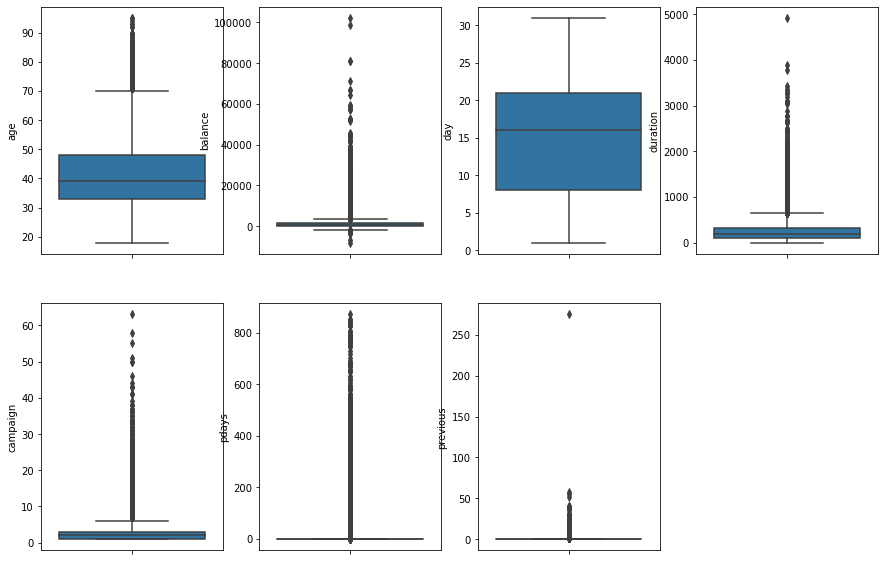

In [24]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank)

##### There are lot of outliers present in the dataframe but we can't drop them because of the very large quantity and are important for model making
---

<AxesSubplot:>

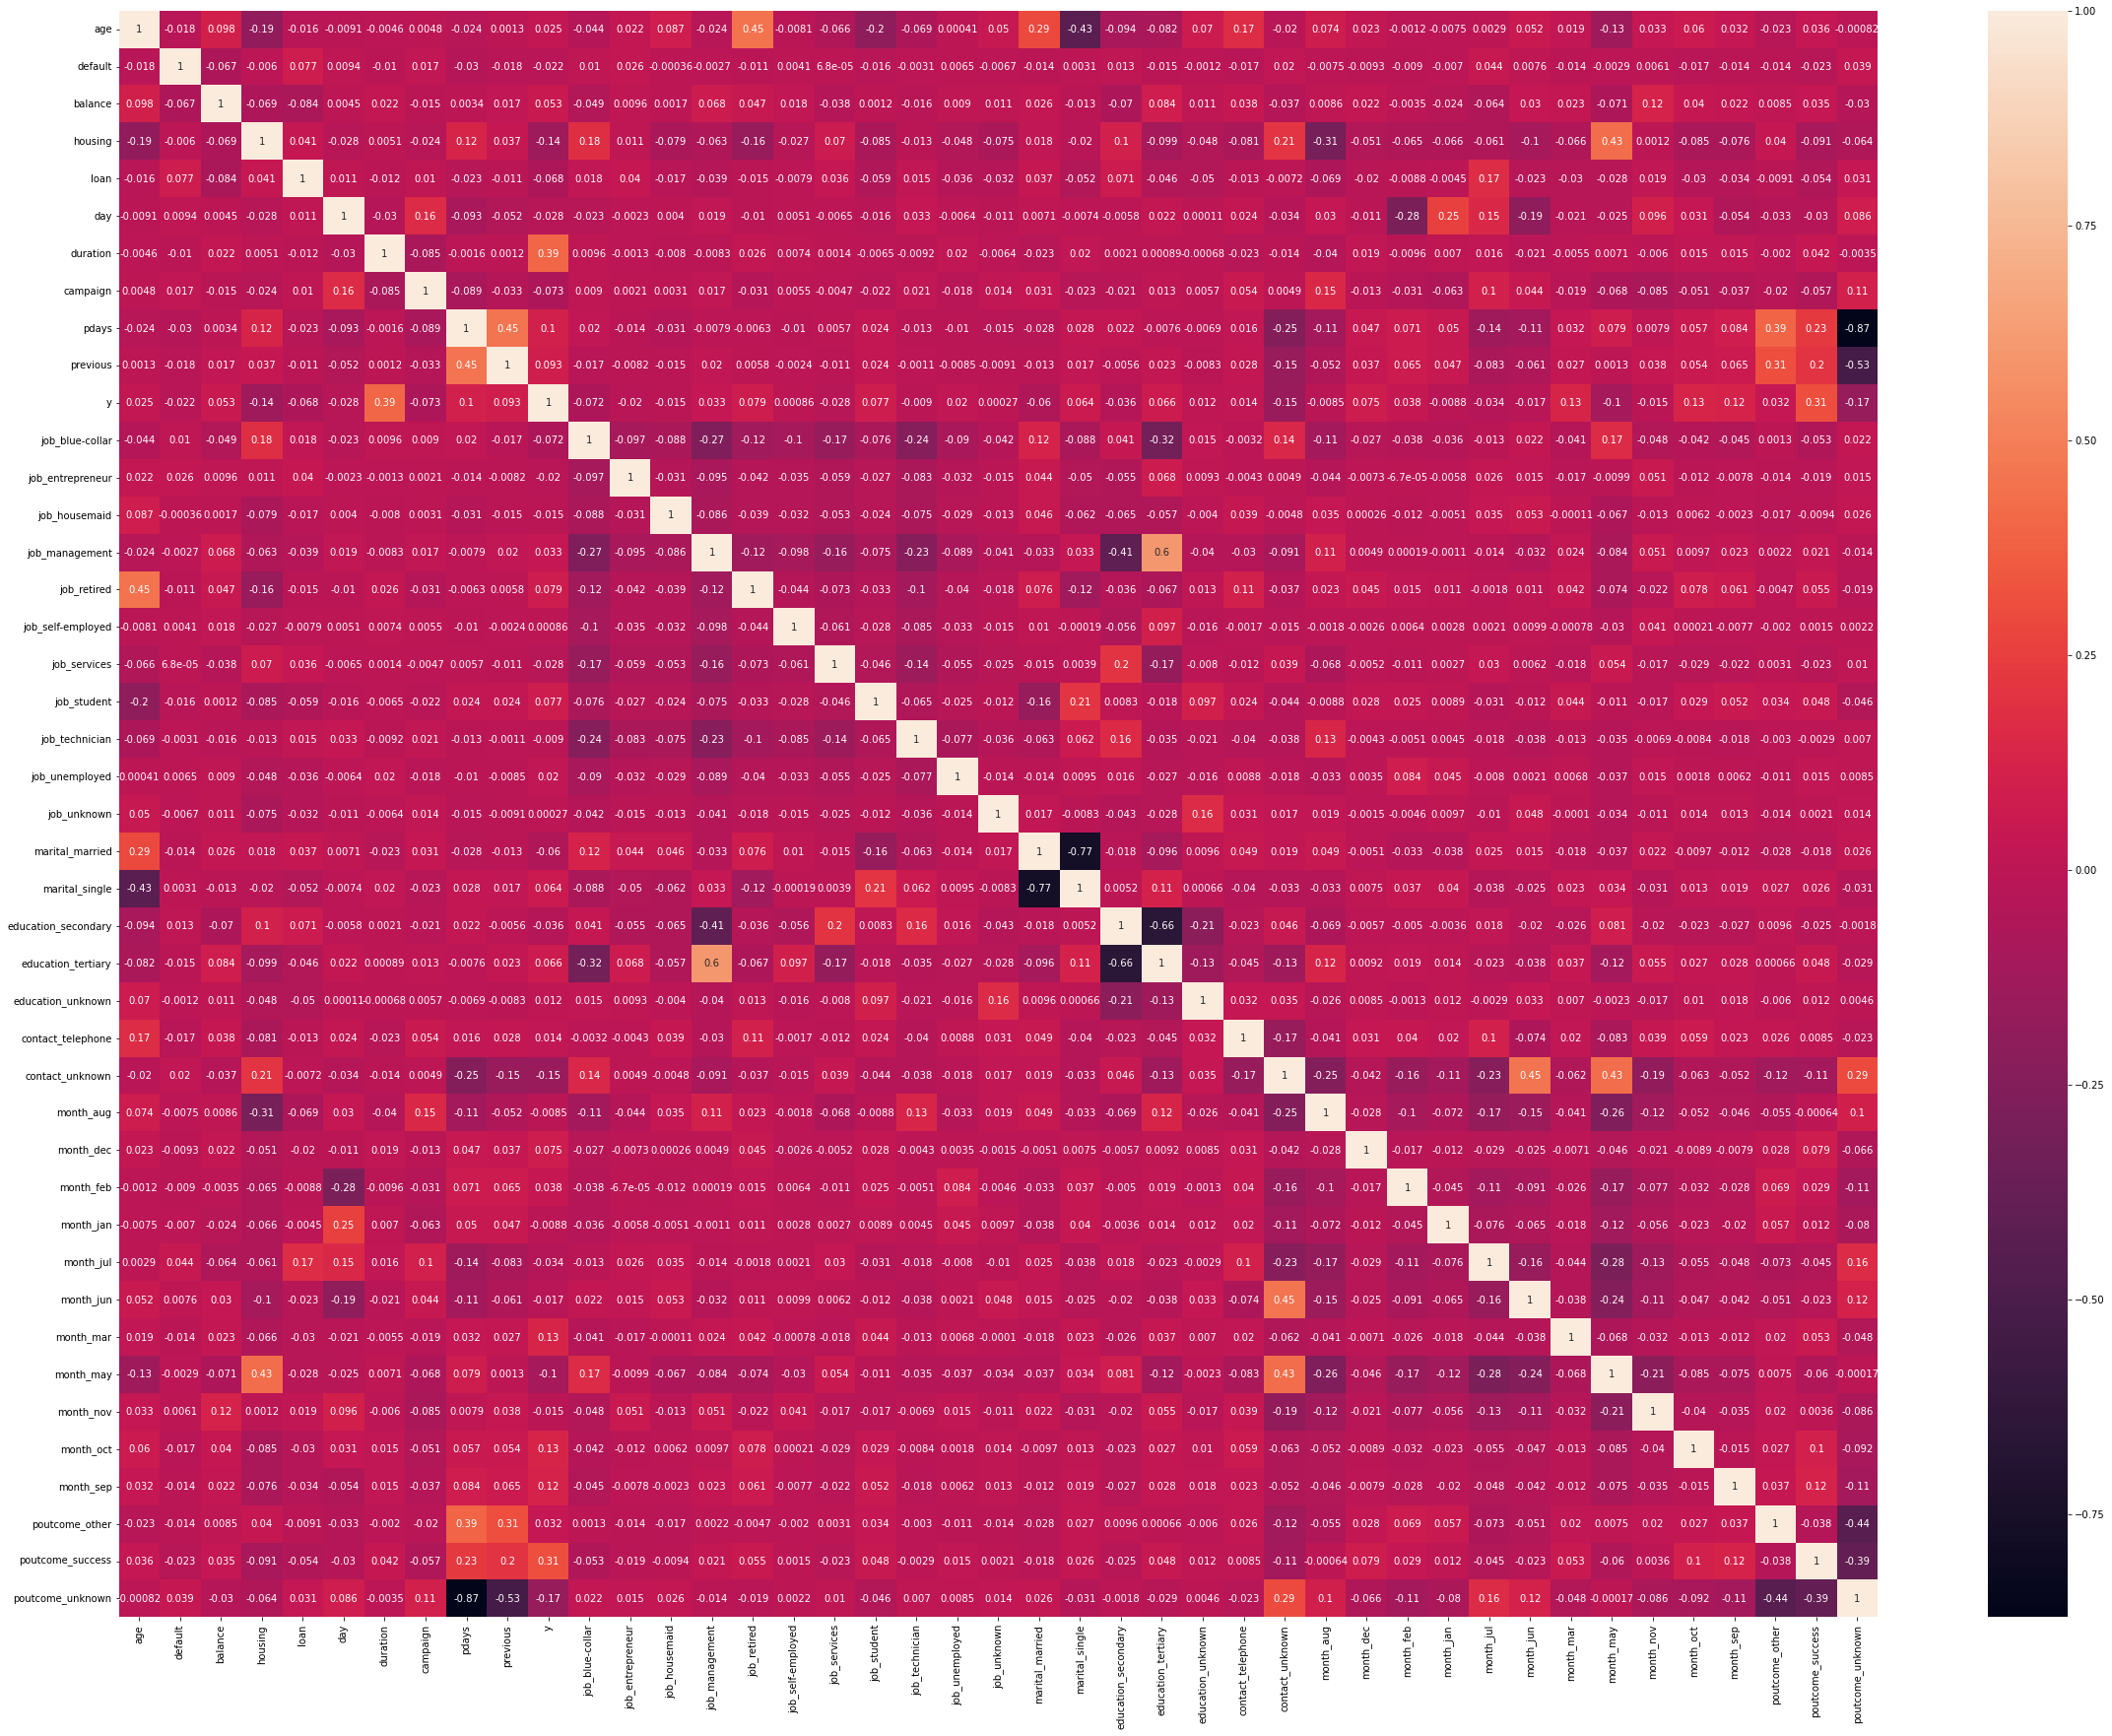

In [26]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True,xticklabels = True)

##### We are not gonna drop any column because none of the column is very highly correlated with the target column
---

In [27]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [28]:
# subscription rate
round((sum(bank['y'])/len(bank.index))*100,2)

11.7

##### This shows that approximately 12% people are subscribed to the bank term deposit

---
##### Splitting the target variable and the predictor features in two different dataframes from Train Test Split 

In [29]:
# X will have all the features
X = bank.drop(['y'],1)
# Y will have the target variable
Y = bank['y']

In [30]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [31]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

---
## Step 3: Train Test Split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

##### Splitting the data in train and test dataframe in the ratio of 7:3


---
## Step 4: Feature Scaling

In [33]:
scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [34]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
18391,-0.087715,0,1.103100,0,0,1.824143,-0.093607,-0.251559,-0.412081,-0.237746,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13056,-1.404878,0,-0.555004,0,1,-0.938821,-0.360990,-0.573232,-0.412081,-0.237746,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13415,1.041282,0,0.655212,1,0,-0.818692,-0.248612,-0.573232,-0.412081,-0.237746,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
21022,-0.181798,0,-0.223447,0,0,-0.218048,0.150526,-0.251559,-0.412081,-0.237746,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
24510,0.853116,0,-0.172097,0,0,0.142339,-0.725251,-0.573232,0.977123,0.579851,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


---
## Step 5: Model Building

##### Buiding first logistic regression model 

In [35]:
# logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(x_train.values)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31604
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7495.1
Date:                Sat, 05 Nov 2022   Deviance:                       14990.
Time:                        18:31:29   Pearson chi2:                 3.17e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2205
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5776      0.164     -9.648      0.000      -1.898      -1.257
x1             0.0260      0.028      0.925      0.355      -0.029       0.081
x2            -0.1470      0.208     -0.705      0.481      -0.556       0.262
x3             0.0420      0.018      2.330      0.020       0.007       0.077
x4            -0.6830      0.053    -12.990      0.000      -0.786      -0.580
x5            -0.4301      0.073     -5.913      0.000      -0.573      -0.288
x6             0.0827      0.025      3.332      0.001       0.034       0.131
x7             1.0871      0.020     54.354      0.000       1.048       1.126
x8            -0.2476      0.036     -6.785      0.000      -0.319      -0.176
x9            -0.0542      0.038     -1.444      0.149      -0.128       0.019
x10            0.0161      0.016      1.023      0.306      -0.015       0.047
x11           -0.1813      0.087     -2.080      0.037      -0.352      -0.010
x12           -0.3781      0.153     -2.476      0.013      -0.677      -0.079
x13           -0.4418      0.164     -2.702      0.007      -0.762      -0.121
x14           -0.1388      0.089     -1.560      0.119      -0.313       0.036
x15            0.2457      0.117      2.094      0.036       0.016       0.476
x16           -0.3501      0.137     -2.553      0.011      -0.619      -0.081
x17           -0.1662      0.101     -1.641      0.101      -0.365       0.032
x18            0.4831      0.133      3.629      0.000       0.222       0.744
x19           -0.1814      0.084     -2.170      0.030      -0.345      -0.018
x20           -0.0547      0.134     -0.408      0.683      -0.317       0.208
x21            0.0241      0.257      0.094      0.925      -0.479       0.527
x22           -0.1333      0.071     -1.866      0.062      -0.273       0.007
x23            0.1675      0.081      2.057      0.040       0.008       0.327
x24            0.2867      0.078      3.665      0.000       0.133       0.440
x25            0.4671      0.091      5.110      0.000       0.288       0.646
x26            0.2782      0.125      2.217      0.027       0.032       0.524
x27           -0.1836      0.089     -2.054      0.040      -0.359      -0.008
x28           -1.6908      0.089    -19.046      0.000      -1.865      -1.517
x29           -0.6770      0.094     -7.214      0.000      -0.861      -0.493
x30            0.7339      0.210      3.492      0.000       0.322       1.146
x31           -0.1288      0.107     -1.208      0.227      -0.338       0.080
x32           -1.4018      0.150     -9.341      0.000      -1.696      -1.108
x33           -0.8467      0.093     -9.116      0.000      -1.029      -0.665
x34            0.4960      0.112      4.426      0.000       0.276       0.716
x35            1.5116      0.149     10.176      0.000       1.220       1.803
x3

---
## Step 6: Feature Selection using RFE

In [36]:
logreg = LogisticRegression()

In [43]:
# Running RFE with 13 variables as output
rfe = RFE(logreg,20)
rfe = rfe.fit(x_train,y_train)

In [38]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

NameError: name 'rfe' is not defined

In [45]:
col1 = x_train.columns[rfe.support_]
col1

Index(['housing', 'loan', 'duration', 'job_housemaid', 'job_retired',
       'job_student', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_unknown', 'month_aug', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

In [46]:
x_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_management',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'contact_telephone',
       'month_feb', 'poutcome_other', 'poutcome_unknown'],
      dtype='object')

##### Assessing the model with StatsModels

In [47]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31625
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7565.6
Date:                Sat, 05 Nov 2022   Deviance:                       15131.
Time:                        18:38:55   Pearson chi2:                 3.49e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2170
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9803      0.087    -22.877      0.000      -2.150      -1.811
housing                -0.6927      0.051    -13.697      0.000      -0.792      -0.594
loan                   -0.4659      0.072     -6.453      0.000      -0.607      -0.324
duration                1.0848      0.020     54.783      0.000       1.046       1.124
job_housemaid          -0.2909      0.150     -1.945      0.052      -0.584       0.002
job_retired             0.3969      0.084      4.749      0.000       0.233       0.561
job_student             0.7553      0.114      6.643      0.000       0.532       0.978
education_secondary     0.3529      0.074      4.792      0.000       0.209       0.497
education_tertiary      0.5469      0.077      7.081      0.000       0.396       0.698
education_unknown       0.3341      0.122      2.740      0.006       0.095       0.573
contact_unknown        -1.7402      0.085    -20.357      0.000      -1.908      -1.573
month_aug              -0.7674      0.076    -10.061      0.000      -0.917      -0.618
month_dec               0.7677      0.204      3.772      0.000       0.369       1.167
month_jan              -1.1787      0.140     -8.397      0.000      -1.454      -0.904
month_jul              -0.8837      0.078    -11.286      0.000      -1.037      -0.730
month_jun               0.5010      0.098      5.137      0.000       0.310       0.692
month_mar               1.5712      0.139     11.320      0.000       1.299       1.843
month_may              -0.3482      0.074     -4.694      0.000      -0.494      -0.203
month_nov              -0.7417      0.088     -8.391      0.000      -0.915      -0.568
month_oct               1.1150      0.120      9.316      0.000       0.880       1.350
month_sep               0.9656      0.132      7.309      0.000       0.707       1.225
poutcome_success        2.4342      0.078     31.296      0.000       2.282       2.587
=======================================================================================
"""

In [53]:
# predicted values of the train dataset giving the probability
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.068320
13056    0.033288
13415    0.036279
21022    0.115318
24510    0.049178
14062    0.009202
16250    0.033809
16330    0.026708
35883    0.062074
12306    0.030371
dtype: float64

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06832046, 0.03328812, 0.03627857, 0.11531838, 0.04917849,
       0.00920171, 0.03380865, 0.02670844, 0.0620741 , 0.03037058])

---
##### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [55]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.068320,18391
1,0,0.033288,13056
2,0,0.036279,13415
3,0,0.115318,21022
4,0,0.049178,24510
5,0,0.009202,14062
6,0,0.033809,16250
7,0,0.026708,16330
8,0,0.062074,35883
9,0,0.030371,12306


##### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [56]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.068320,18391,0
1,0,0.033288,13056,0
2,0,0.036279,13415,0
3,0,0.115318,21022,0
4,0,0.049178,24510,0
5,0,0.009202,14062,0
6,0,0.033809,16250,0
7,0,0.026708,16330,0
8,0,0.062074,35883,0
9,0,0.030371,12306,0


In [57]:
# creating confusion matrix for the following prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[27275,   662],
       [ 2400,  1310]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2726|59
**Sub**|260|119

In [58]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.903245173318166


##### The accuracy of the model is approximately 90% which is a really good model for prediction but we need to check the VIFs as well

---
### Checking VIFs for the selected 20 variables

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
16,month_may,3.62
6,education_secondary,3.02
9,contact_unknown,2.92
0,housing,2.71
14,month_jun,2.27
7,education_tertiary,2.16
13,month_jul,1.64
10,month_aug,1.56
17,month_nov,1.38
1,loan,1.23


##### There are no feature in the above VIF table whose value is greater than 5. So, there is no need to drop any of these features for proceeding to the prediction. 

##### But we need to check the p-values as well from the StatsModel to proceed further.

In [60]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31625
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7565.6
Date:                Sat, 05 Nov 2022   Deviance:                       15131.
Time:                        18:39:59   Pearson chi2:                 3.49e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2170
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9803      0.087    -22.877      0.000      -2.150      -1.811
housing                -0.6927      0.051    -13.697      0.000      -0.792      -0.594
loan                   -0.4659      0.072     -6.453      0.000      -0.607      -0.324
duration                1.0848      0.020     54.783      0.000       1.046       1.124
job_housemaid          -0.2909      0.150     -1.945      0.052      -0.584       0.002
job_retired             0.3969      0.084      4.749      0.000       0.233       0.561
job_student             0.7553      0.114      6.643      0.000       0.532       0.978
education_secondary     0.3529      0.074      4.792      0.000       0.209       0.497
education_tertiary      0.5469      0.077      7.081      0.000       0.396       0.698
education_unknown       0.3341      0.122      2.740      0.006       0.095       0.573
contact_unknown        -1.7402      0.085    -20.357      0.000      -1.908      -1.573
month_aug              -0.7674      0.076    -10.061      0.000      -0.917      -0.618
month_dec               0.7677      0.204      3.772      0.000       0.369       1.167
month_jan              -1.1787      0.140     -8.397      0.000      -1.454      -0.904
month_jul              -0.8837      0.078    -11.286      0.000      -1.037      -0.730
month_jun               0.5010      0.098      5.137      0.000       0.310       0.692
month_mar               1.5712      0.139     11.320      0.000       1.299       1.843
month_may              -0.3482      0.074     -4.694      0.000      -0.494      -0.203
month_nov              -0.7417      0.088     -8.391      0.000      -0.915      -0.568
month_oct               1.1150      0.120      9.316      0.000       0.880       1.350
month_sep               0.9656      0.132      7.309      0.000       0.707       1.225
poutcome_success        2.4342      0.078     31.296      0.000       2.282       2.587
=======================================================================================
"""

##### We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [61]:
# dropping column 'month_sep'
col1 = col1.drop('month_sep',1)
col1

Index(['housing', 'loan', 'duration', 'job_housemaid', 'job_retired',
       'job_student', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_unknown', 'month_aug', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'poutcome_success'],
      dtype='object')

In [66]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7591.6
Date:                Sat, 05 Nov 2022   Deviance:                       15183.
Time:                        18:40:28   Pearson chi2:                 3.42e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2157
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8502      0.084    -22.076      0.000      -2.015      -1.686
housing                -0.7217      0.050    -14.349      0.000      -0.820      -0.623
loan                   -0.4747      0.072     -6.587      0.000      -0.616      -0.333
duration                1.0837      0.020     54.770      0.000       1.045       1.122
job_housemaid          -0.2940      0.150     -1.962      0.050      -0.588      -0.000
job_retired             0.4314      0.083      5.195      0.000       0.269       0.594
job_student             0.7886      0.113      6.975      0.000       0.567       1.010
education_secondary     0.3475      0.073      4.733      0.000       0.204       0.491
education_tertiary      0.5511      0.077      7.158      0.000       0.400       0.702
education_unknown       0.3466      0.121      2.853      0.004       0.108       0.585
contact_unknown        -1.7233      0.086    -20.131      0.000      -1.891      -1.556
month_aug              -0.9018      0.073    -12.287      0.000      -1.046      -0.758
month_dec               0.6238      0.203      3.075      0.002       0.226       1.021
month_jan              -1.3131      0.139     -9.437      0.000      -1.586      -1.040
month_jul              -1.0045      0.076    -13.228      0.000      -1.153      -0.856
month_jun               0.3641      0.095      3.818      0.000       0.177       0.551
month_mar               1.4360      0.137     10.447      0.000       1.167       1.705
month_may              -0.4636      0.072     -6.450      0.000      -0.604      -0.323
month_nov              -0.8660      0.086    -10.039      0.000      -1.035      -0.697
month_oct               0.9772      0.118      8.280      0.000       0.746       1.209
poutcome_success        2.4823      0.077     32.124      0.000       2.331       2.634
=======================================================================================
"""

In [69]:
# dropping column job_entrepreneur
col1 = col1.drop('job_entrepreneur',1)
col1

KeyError: "['job_entrepreneur'] not found in axis"

In [68]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7591.6
Date:                Sat, 05 Nov 2022   Deviance:                       15183.
Time:                        18:40:30   Pearson chi2:                 3.42e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2157
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8502      0.084    -22.076      0.000      -2.015      -1.686
housing                -0.7217      0.050    -14.349      0.000      -0.820      -0.623
loan                   -0.4747      0.072     -6.587      0.000      -0.616      -0.333
duration                1.0837      0.020     54.770      0.000       1.045       1.122
job_housemaid          -0.2940      0.150     -1.962      0.050      -0.588      -0.000
job_retired             0.4314      0.083      5.195      0.000       0.269       0.594
job_student             0.7886      0.113      6.975      0.000       0.567       1.010
education_secondary     0.3475      0.073      4.733      0.000       0.204       0.491
education_tertiary      0.5511      0.077      7.158      0.000       0.400       0.702
education_unknown       0.3466      0.121      2.853      0.004       0.108       0.585
contact_unknown        -1.7233      0.086    -20.131      0.000      -1.891      -1.556
month_aug              -0.9018      0.073    -12.287      0.000      -1.046      -0.758
month_dec               0.6238      0.203      3.075      0.002       0.226       1.021
month_jan              -1.3131      0.139     -9.437      0.000      -1.586      -1.040
month_jul              -1.0045      0.076    -13.228      0.000      -1.153      -0.856
month_jun               0.3641      0.095      3.818      0.000       0.177       0.551
month_mar               1.4360      0.137     10.447      0.000       1.167       1.705
month_may              -0.4636      0.072     -6.450      0.000      -0.604      -0.323
month_nov              -0.8660      0.086    -10.039      0.000      -1.035      -0.697
month_oct               0.9772      0.118      8.280      0.000       0.746       1.209
poutcome_success        2.4823      0.077     32.124      0.000       2.331       2.634
=======================================================================================
"""

In [64]:
# dropping column default
col1 = col1.drop('default',1)
col1

KeyError: "['default'] not found in axis"

In [54]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3146
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -801.42
Date:                Sun, 20 Sep 2020   Deviance:                       1602.8
Time:                        14:55:11   Pearson chi2:                 3.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9013      0.229     -8.299      0.000      -2.350      -1.452
housing                -0.4359      0.153     -2.854      0.004      -0.735      -0.137
loan                   -0.7235      0.229     -3.156      0.002      -1.173      -0.274
duration                1.0494      0.062     17.030      0.000       0.929       1.170
job_retired             0.8157      0.246      3.313      0.001       0.333       1.298
job_unemployed         -0.8212      0.474     -1.732      0.083      -1.751       0.108
education_secondary     0.5391      0.207      2.607      0.009       0.134       0.944
education_tertiary      0.7785      0.217      3.585      0.000       0.353       1.204
contact_unknown        -1.3081      0.213     -6.151      0.000      -1.725      -0.891
month_aug              -0.8963      0.214     -4.187      0.000      -1.316      -0.477
month_jan              -1.1615      0.388     -2.997      0.003      -1.921      -0.402
month_jul              -1.3237      0.235     -5.633      0.000      -1.784      -0.863
month_mar               0.9175      0.384      2.390      0.017       0.165       1.670
month_may              -0.8748      0.200     -4.376      0.000      -1.267      -0.483
month_nov              -0.9967      0.261     -3.818      0.000      -1.508      -0.485
month_oct               0.8896      0.343      2.593      0.010       0.217       1.562
poutcome_other          0.5805      0.253      2.296      0.022       0.085       1.076
poutcome_success        2.3038      0.255      9.050      0.000       1.805       2.803
=======================================================================================
"""

In [55]:
# dropping column job_unemployed
col1 = col1.drop('job_unemployed',1)
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [56]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3147
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -803.14
Date:                Sun, 20 Sep 2020   Deviance:                       1606.3
Time:                        14:55:11   Pearson chi2:                 4.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9514      0.228     -8.573      0.000      -2.397      -1.505
housing                -0.4234      0.153     -2.774      0.006      -0.723      -0.124
loan                   -0.7170      0.229     -3.131      0.002      -1.166      -0.268
duration                1.0426      0.061     17.013      0.000       0.922       1.163
job_retired             0.8402      0.246      3.419      0.001       0.359       1.322
education_secondary     0.5446      0.207      2.633      0.008       0.139       0.950
education_tertiary      0.7814      0.217      3.599      0.000       0.356       1.207
contact_unknown        -1.3020      0.212     -6.129      0.000      -1.718      -0.886
month_aug              -0.8604      0.213     -4.042      0.000      -1.278      -0.443
month_jan              -1.1896      0.392     -3.037      0.002      -1.957      -0.422
month_jul              -1.2901      0.234     -5.520      0.000      -1.748      -0.832
month_mar               0.9514      0.384      2.478      0.013       0.199       1.704
month_may              -0.8481      0.199     -4.255      0.000      -1.239      -0.457
month_nov              -0.9859      0.260     -3.793      0.000      -1.495      -0.476
month_oct               0.9274      0.342      2.708      0.007       0.256       1.599
poutcome_other          0.6002      0.252      2.382      0.017       0.106       1.094
poutcome_success        2.3114      0.255      9.074      0.000       1.812       2.811
=======================================================================================
"""

##### Now all the features left have a significant p-value which is good for the model 

In [57]:
# predicting the probability once again after dropping the features from data
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

2085    0.027490
1239    0.025830
130     0.024946
2345    0.018567
1296    0.255128
318     0.166012
2461    0.078660
1764    0.050053
2636    0.029428
2578    0.048216
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02748993, 0.02582997, 0.02494595, 0.01856749, 0.25512809,
       0.16601157, 0.07866007, 0.05005317, 0.02942841, 0.04821636])

In [59]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.027490,2085
1,0,0.025830,1239
2,0,0.024946,130
3,0,0.018567,2345
4,0,0.255128,1296
5,1,0.166012,318
6,0,0.078660,2461
7,0,0.050053,1764
8,0,0.029428,2636
9,0,0.048216,2578


In [60]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.027490,2085,0
1,0,0.025830,1239,0
2,0,0.024946,130,0
3,0,0.018567,2345,0
4,0,0.255128,1296,0
5,1,0.166012,318,0
6,0,0.078660,2461,0
7,0,0.050053,1764,0
8,0,0.029428,2636,0
9,0,0.048216,2578,0


In [61]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

[[2725   60]
 [ 258  121]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2725|60
**Sub**|258|121

In [62]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8994943109987358


##### The accuracy has increased with a very small margin after dropping the insignificant features from model

---
## Metrics beyond simply accuracy

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.31926121372031663

In [65]:
# Let us calculate specificity
TN/float(TN+FP)

0.9784560143626571

In [66]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.02154398563734291

In [67]:
# positive predictive value 
TP/float(TP+FP)

0.6685082872928176

In [68]:
# Negative predictive value
TN/float(TN+FN)

0.9135098893731143

---
### Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [69]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

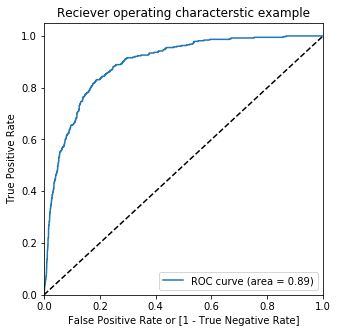

In [71]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

---
### Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.027490,2085,0,1,0,0,0,0,0,0,0,0,0
1,0,0.025830,1239,0,1,0,0,0,0,0,0,0,0,0
2,0,0.024946,130,0,1,0,0,0,0,0,0,0,0,0
3,0,0.018567,2345,0,1,0,0,0,0,0,0,0,0,0
4,0,0.255128,1296,0,1,1,1,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.119785  1.000000  0.000000
0.1   0.1  0.787295  0.852243  0.778456
0.2   0.2  0.875790  0.638522  0.908079
0.3   0.3  0.896966  0.527704  0.947217
0.4   0.4  0.900126  0.398417  0.968402
0.5   0.5  0.899494  0.319261  0.978456
0.6   0.6  0.896334  0.255937  0.983483
0.7   0.7  0.890329  0.176781  0.987433
0.8   0.8  0.883375  0.092348  0.991023
0.9   0.9  0.882427  0.044855  0.996409


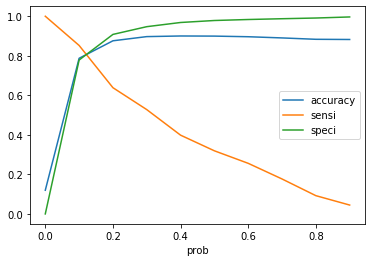

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

---
#### From the curve above, 0.15 is the optimum point to take it as a cutoff probability

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>0.15 else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.027490,2085,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.025830,1239,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.024946,130,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.018567,2345,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.255128,1296,0,1,1,1,0,0,0,0,0,0,0,1


In [76]:
metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.final_predicted)

0.8549304677623262

In [77]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.final_predicted)
confusion2

array([[2426,  359],
       [ 100,  279]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2426|359
**Sub**|100|279

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7361477572559367

In [80]:
# Let us calculate specificity
TN/float(TN+FP)

0.8710951526032316

In [81]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.1289048473967684

In [82]:
# Positive predictive value 
TP/float(TP+FP)

0.4373040752351097

In [83]:
# Negative predictive value
TN/float(TN+ FN)

0.9604117181314331

---
## Precision and Recall

In [84]:
# Looking at the confusion matrix again
confusion

array([[2725,   60],
       [ 258,  121]], dtype=int64)

In [85]:
# Second confusion matrix
confusion2

array([[2426,  359],
       [ 100,  279]], dtype=int64)

##### Precision
TP / TP + FP

In [86]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6685082872928176

##### Recall
TP / TP + FN

In [87]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.31926121372031663

---
#### Using sklearn utilities for finding precision and recall

In [88]:
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6685082872928176

In [89]:
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.31926121372031663

---
## Step 9: Precision and Recall takeoff

In [90]:
y_train_pred_final.Sub, y_train_pred_final.predict

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: Sub, Length: 3164, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: predict, Length: 3164, dtype: int64)

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

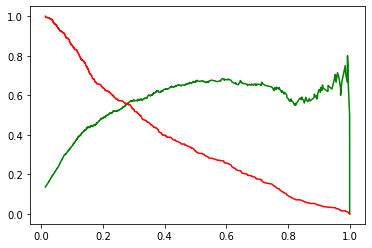

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

---
## Step 10: Making predictions on Test data

In [93]:
# transforming the test data
x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])

In [94]:
x_test = x_test[col1]
x_test.head()

,housing,loan,duration,job_retired,education_secondary,education_tertiary,contact_unknown,month_aug,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success
3731,0,0,-0.457546,1,1,0,0,0,0,0,0,0,1,0,0,0
2367,1,0,1.326816,0,0,0,1,0,0,0,0,1,0,0,0,0
1166,0,0,0.202218,0,0,1,0,0,0,0,0,0,0,0,0,1
2973,1,1,1.428030,0,1,0,1,0,0,0,0,1,0,0,0,0
2139,0,0,-0.108921,0,0,1,0,0,0,1,0,0,0,0,0,0


In [95]:
x_test_sm = sm.add_constant(x_test)

---
##### Making predictions on the test data 

In [96]:
y_test_pred = res.predict(x_test_sm)

In [97]:
y_test_pred[:10]

3731    0.116140
2367    0.041423
1166    0.794494
2973    0.038847
2139    0.070857
731     0.012352
1640    0.013771
4208    0.038354
2152    0.029139
107     0.177268
dtype: float64

In [98]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
y_pred_1.head()

,0
3731,0.116140
2367,0.041423
1166,0.794494
2973,0.038847
2139,0.070857


In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Putting Cust_id to index
y_test_df['Cust_id'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [104]:
y_pred.head()

,y,Cust_id,0
0,0,3731,0.116140
1,0,2367,0.041423
2,1,1166,0.794494
3,1,2973,0.038847
4,0,2139,0.070857


In [105]:
# renaming the columns
y_pred.rename(columns={'y':'Sub',0:'Sub_prob'},inplace=True)

In [106]:
y_pred.head()

,Sub,Cust_id,Sub_prob
0,0,3731,0.116140
1,0,2367,0.041423
2,1,1166,0.794494
3,1,2973,0.038847
4,0,2139,0.070857


In [107]:
# putting the limit of 0.25 from the precision_recall_curve
y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [108]:
y_pred.head()

,Sub,Cust_id,Sub_prob,final_predict
0,0,3731,0.116140,0
1,0,2367,0.041423,0
2,1,1166,0.794494,1
3,1,2973,0.038847,0
4,0,2139,0.070857,0


In [109]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.9027266028002948

In [110]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[1137,   78],
       [  54,   88]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|1137|78
**Sub**|54|88

In [111]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.6197183098591549

In [113]:
# Let us calculate specificity
TN/float(TN+FP)

0.9358024691358025